In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import warnings
import seaborn as sns
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')

mercedes_data=pd.read_csv('Mercedes (1).csv')


cat_cols=[col for col in mercedes_data.columns if mercedes_data[col].dtype=='object']

target=mercedes_data['y']

mercedes_data.drop(columns='y',inplace=True)

cols_to_drop=[]

for col in mercedes_data.columns:
    if len(np.unique(mercedes_data[col]))== mercedes_data.shape[0] or len(np.unique(mercedes_data[col]))==1:
        cols_to_drop.append(col)

cols_to_drop

mercedes_data.drop(columns=cols_to_drop,inplace=True)

X_train,X_test,y_train,y_test=train_test_split(mercedes_data,target,test_size=0.2,random_state=42)

target.describe()


le=LabelEncoder()



cols_to_drop

['ID',
 'X11',
 'X93',
 'X107',
 'X233',
 'X235',
 'X268',
 'X289',
 'X290',
 'X293',
 'X297',
 'X330',
 'X347']

In [4]:
cols_to_drop=[]

for col in mercedes_data.columns:
    if len(np.unique(mercedes_data[col]))== mercedes_data.shape[0] or len(np.unique(mercedes_data[col]))==1:
        cols_to_drop.append(col)

cols_to_drop

[]

In [5]:
mercedes_data.shape

(4209, 364)

In [7]:
class LabelEncoderExt(object):
    def __init__(self):
        """
        It differs from LabelEncoder by handling new classes and providing a value for it [Unknown]
        Unknown will be added in fit and transform will take care of new item. It gives unknown class id
        """
        self.label_encoder = LabelEncoder()
        # self.classes_ = self.label_encoder.classes_

    def fit(self, data_list):
        """
        This will fit the encoder for all the unique values and introduce unknown value
        :param data_list: A list of string
        :return: self
        """
        self.label_encoder = self.label_encoder.fit(list(data_list) + ['Unknown'])
        self.classes_ = self.label_encoder.classes_

        return self

    def transform(self, data_list):
        """
        This will transform the data_list to id list where the new values get assigned to Unknown class
        :param data_list:
        :return:
        """
        new_data_list = list(data_list)
        for unique_item in np.unique(data_list):
            if unique_item not in self.label_encoder.classes_:
                new_data_list = ['Unknown' if x==unique_item else x for x in new_data_list]

        return self.label_encoder.transform(new_data_list)

In [8]:
le=LabelEncoderExt()

cat_cols=[col for col in X_train.columns if X_train[col].dtype=='object']
for col in cat_cols:
    le.fit(X_train[col])
    X_train[col]=le.transform(X_train[col])
    X_test[col]=le.transform(X_test[col])
    

X_train

,X0,X1,X2,X3,X4,X5,X6,X8,X10,X12,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
1006,34,24,17,3,4,7,11,24,0,0,...,0,0,1,0,0,0,0,0,0,0
1840,35,21,17,4,4,5,7,19,0,0,...,1,0,0,0,0,0,0,0,0,0
3792,27,5,33,3,4,26,9,5,0,0,...,0,0,1,0,0,0,0,0,0,0
152,31,2,28,4,4,14,9,5,0,0,...,0,1,0,0,0,0,0,0,0,0
1557,19,11,17,3,4,4,12,11,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3444,31,11,17,3,4,23,12,18,0,0,...,0,0,1,0,0,0,0,0,0,0
466,20,26,26,3,4,10,10,10,0,0,...,0,0,0,0,0,0,1,0,0,0
3092,45,25,4,3,4,22,9,3,0,0,...,1,0,0,0,0,0,0,0,0,0
3772,45,20,9,6,4,26,9,2,0,1,...,0,0,0,0,0,0,0,0,0,0


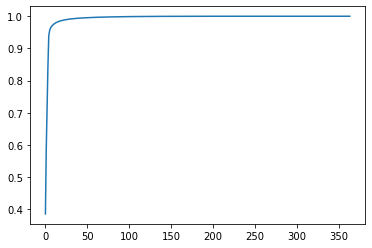

In [9]:
from sklearn.decomposition import  PCA

pca=PCA()
X_train_pca_df=pd.DataFrame(pca.fit_transform(X_train))

plt.plot(np.cumsum(pca.explained_variance_ratio_))



In [13]:
pca.explained_variance_ratio_

array([3.86001453e-01, 2.02461541e-01, 1.36571828e-01, 1.19913487e-01,
       9.44690848e-02, 1.59898694e-02, 7.58666354e-03, 4.45601578e-03,
       3.03658703e-03, 2.48937824e-03, 2.40885247e-03, 2.01942836e-03,
       1.68438192e-03, 1.49805963e-03, 1.31715671e-03, 1.05672330e-03,
       9.56937433e-04, 9.20785473e-04, 7.82713294e-04, 7.17099444e-04,
       6.57274153e-04, 6.34109848e-04, 5.86819124e-04, 5.19041785e-04,
       4.95507625e-04, 4.47177611e-04, 4.09722580e-04, 3.80469657e-04,
       3.70791804e-04, 3.56875281e-04, 3.32427489e-04, 3.12681757e-04,
       3.03701859e-04, 2.78104353e-04, 2.62451678e-04, 2.53040467e-04,
       2.27024350e-04, 2.17624816e-04, 2.05476068e-04, 1.97970720e-04,
       1.84892231e-04, 1.83338893e-04, 1.78909767e-04, 1.76932402e-04,
       1.70639880e-04, 1.53527941e-04, 1.50269825e-04, 1.46323887e-04,
       1.39362790e-04, 1.35205812e-04, 1.33446542e-04, 1.32422261e-04,
       1.29824575e-04, 1.21536788e-04, 1.15671187e-04, 1.10344847e-04,
      

In [14]:
pca_1=PCA(n_components=50)

X_train_pca_df=pd.DataFrame(pca_1.fit_transform(X_train),columns=list(range(0,50)))

X_test_pca_df=pd.DataFrame(pca_1.transform(X_test))

In [15]:
# Proof that PCA results in Zero or No Multicollinearity

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_pca = pd.DataFrame()
vif_pca["VIF Factor_PCA"] = [variance_inflation_factor(X_train_pca_df.values, i) for i in range(X_train_pca_df.shape[1])]

vif_pca['Column Name']=X_train_pca_df.columns

vif_pca


,VIF Factor_PCA,Column Name
0,1.0,0
1,1.0,1
2,1.0,2
3,1.0,3
4,1.0,4
5,1.0,5
6,1.0,6
7,1.0,7
8,1.0,8
9,1.0,9


In [19]:
# multicollinearity exists on the data wihout PCA
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]

vif['Column Name']=X_train.columns

vif


,VIF Factor,Column Name
0,2.675180,X0
1,6.709193,X1
2,19.729722,X2
3,2.896552,X3
4,1.040918,X4
...,...,...
359,inf,X380
360,inf,X382
361,1.413636,X383
362,1.442836,X384


In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error

lin_reg=LinearRegression()

lin_reg.fit(X_train_pca_df,y_train)

y_linreg_pred=lin_reg.predict(X_test_pca_df)

r2_score(y_true=y_test,y_pred=y_linreg_pred)
print('Train Score:----',lin_reg.score(X_train_pca_df,y_train))
print('Test Score:----',lin_reg.score(X_test_pca_df,y_test))

mean_squared_error(y_test,y_linreg_pred)

Train Score:---- 0.5206708457697571
Test Score:---- 0.5388855437391862


71.77243728618696

In [ ]:
import pickle

pickle.dump(lin_reg, open('model.pkl','wb'))


In [ ]:
from sklearn.linear_model import Lasso

lasso=Lasso(alpha=1)
lasso.fit(X_train_pca_df,y_train)
y_lasso_pred=lasso.predict(X_test_pca_df)

lasso.score(X_test_pca_df,y_test)